# Machine Learning Project 
## Dataset: Cars sale in Poland
### Paweł Pyciński

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data =  pd.read_csv(os.path.join("Car_sale_ads.csv"))
data.head()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


## Let's have a look for some info about our data

In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    105000 non-null  int64  
 1   Price                    105000 non-null  int64  
 2   Currency                 105000 non-null  object 
 3   Condition                105000 non-null  object 
 4   Vehicle_brand            105000 non-null  object 
 5   Vehicle_model            105000 non-null  object 
 6   Vehicle_version          70308 non-null   object 
 7   Vehicle_generation       73951 non-null   object 
 8   Production_year          105000 non-null  int64  
 9   Mileage_km               104443 non-null  float64
 10  Power_HP                 104674 non-null  float64
 11  Displacement_cm3         104042 non-null  float64
 12  Fuel_type                105000 non-null  object 
 13  CO2_emissions            48709 non-null   float64
 14  Driv

,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,CO2_emissions,Doors_number
count,105000.00000,1.050000e+05,105000.000000,1.044430e+05,104674.000000,104042.000000,4.870900e+04,104224.000000
mean,52499.50000,7.451938e+04,2012.196086,1.384271e+05,170.469964,2049.539888,6.160892e+05,4.596475
std,30311.03347,1.008945e+05,6.948696,3.284591e+05,88.493810,839.339441,1.013157e+08,0.787655
min,0.00000,5.000000e+02,1915.000000,1.000000e+00,1.000000,400.000000,1.000000e+00,1.000000
25%,26249.75000,1.970000e+04,2008.000000,4.660000e+04,115.000000,1560.000000,1.240000e+02,4.000000
50%,52499.50000,4.090000e+04,2013.000000,1.417260e+05,150.000000,1984.000000,1.450000e+02,5.000000
75%,78749.25000,8.900000e+04,2018.000000,2.085000e+05,193.000000,2000.000000,1.690000e+02,5.000000
max,104999.00000,6.999000e+06,2021.000000,1.000000e+08,1398.000000,8400.000000,2.000000e+10,7.000000


### Let's check where we have null values

In [4]:
plt.figure(figsize=(9,3),dpi=150)
data.isnull().sum()

Index                          0
Price                          0
Currency                       0
Condition                      0
Vehicle_brand                  0
Vehicle_model                  0
Vehicle_version            34692
Vehicle_generation         31049
Production_year                0
Mileage_km                   557
Power_HP                     326
Displacement_cm3             958
Fuel_type                      0
CO2_emissions              56291
Drive                       7422
Transmission                 265
Type                           0
Doors_number                 776
Colour                         0
Origin_country             46853
First_owner                74089
First_registration_date    63978
Offer_publication_date         0
Offer_location                 0
Features                       0
dtype: int64

<Figure size 1350x450 with 0 Axes>

### Let's drop colums with many null values

In [5]:
data=data.drop(['Vehicle_version', 'Vehicle_generation','CO2_emissions','Origin_country','First_owner','First_registration_date'], axis=1)

In [6]:
data.isnull().sum()

Index                        0
Price                        0
Currency                     0
Condition                    0
Vehicle_brand                0
Vehicle_model                0
Production_year              0
Mileage_km                 557
Power_HP                   326
Displacement_cm3           958
Fuel_type                    0
Drive                     7422
Transmission               265
Type                         0
Doors_number               776
Colour                       0
Offer_publication_date       0
Offer_location               0
Features                     0
dtype: int64

#### Now we can fill rest of Nan vaules with mean of data from current column
We need to remember that we can only do it for numeric data!

In [7]:
data['Mileage_km']=data['Mileage_km'].fillna(data['Mileage_km'].mean())
data['Power_HP']=data['Power_HP'].fillna(data['Power_HP'].mean())
data['Displacement_cm3']=data['Displacement_cm3'].fillna(data['Displacement_cm3'].mean())

#### Array with variable coleration
we focus on price because we want to predict price

In [8]:
data.corr()

,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number
Index,1.000000,-0.000758,0.055216,-0.038373,-0.080858,-0.033396,0.052569
Price,-0.000758,1.000000,0.466724,-0.148749,0.632973,0.349270,-0.055887
Production_year,0.055216,0.466724,1.000000,-0.217600,0.174297,-0.154452,0.220666
Mileage_km,-0.038373,-0.148749,-0.217600,1.000000,-0.043824,0.041479,-0.013068
Power_HP,-0.080858,0.632973,0.174297,-0.043824,1.000000,0.814559,-0.202822
Displacement_cm3,-0.033396,0.349270,-0.154452,0.041479,0.814559,1.000000,-0.253904
Doors_number,0.052569,-0.055887,0.220666,-0.013068,-0.202822,-0.253904,1.000000


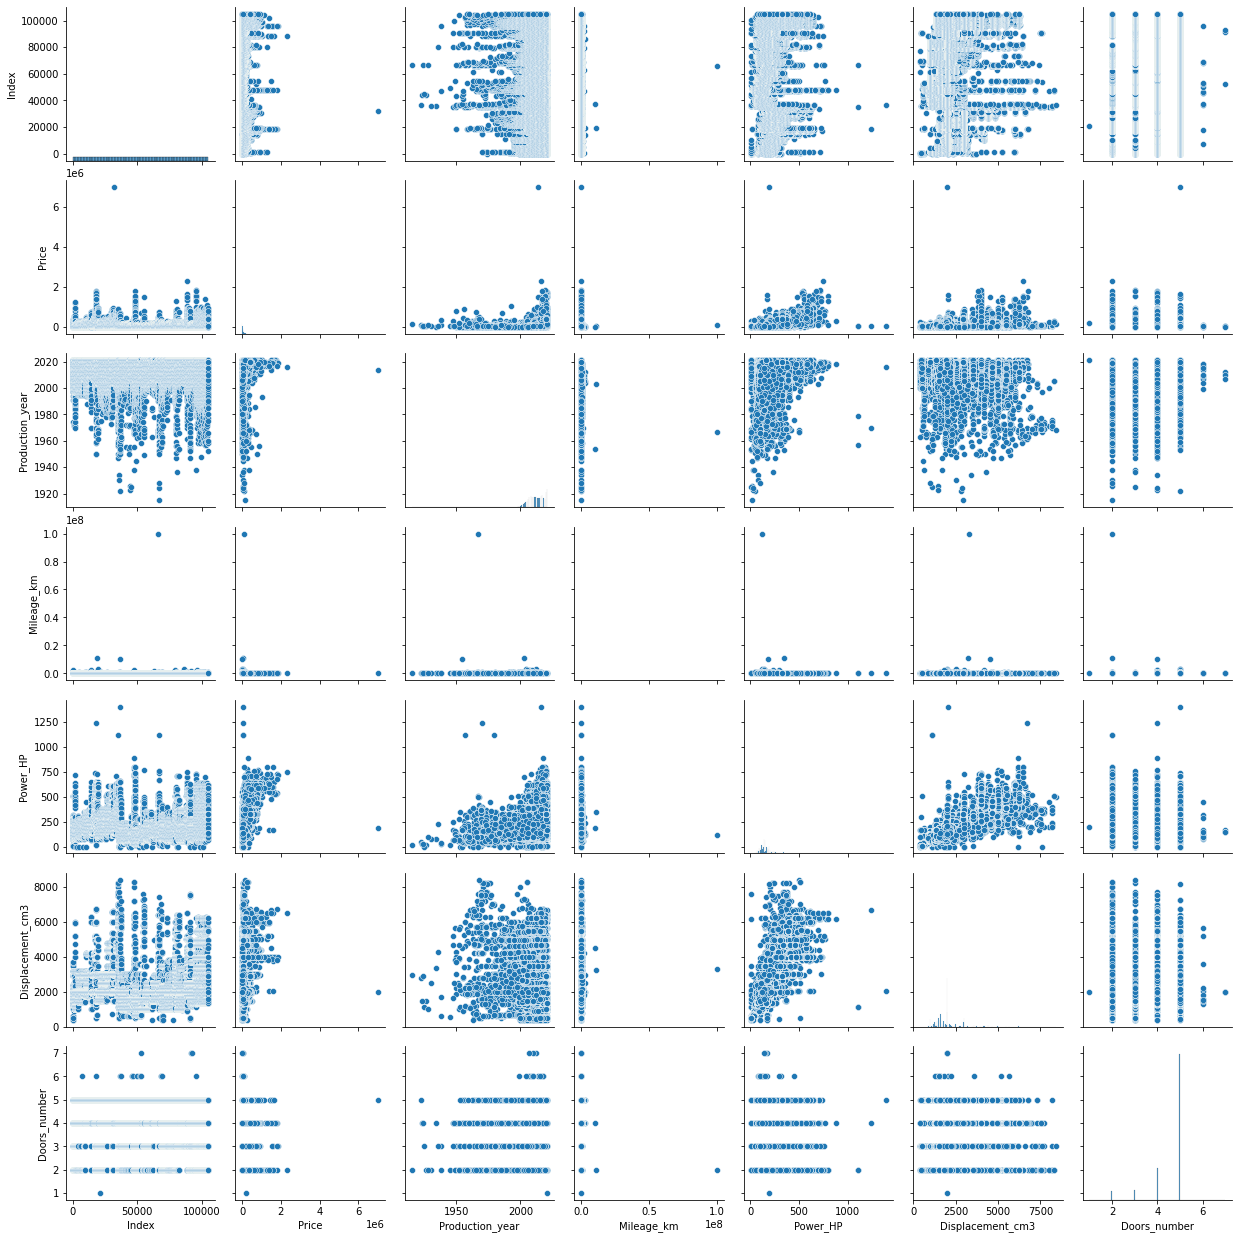

In [9]:
sns.pairplot(data)

#### Now we draw heatmap with variable coleration

<AxesSubplot:>

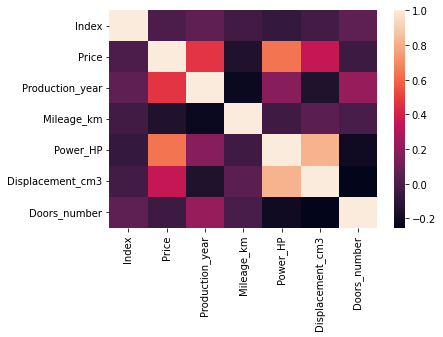

In [10]:
sns.heatmap(data.corr())

### Now let's look for some plots

<AxesSubplot:xlabel='Production_year'>

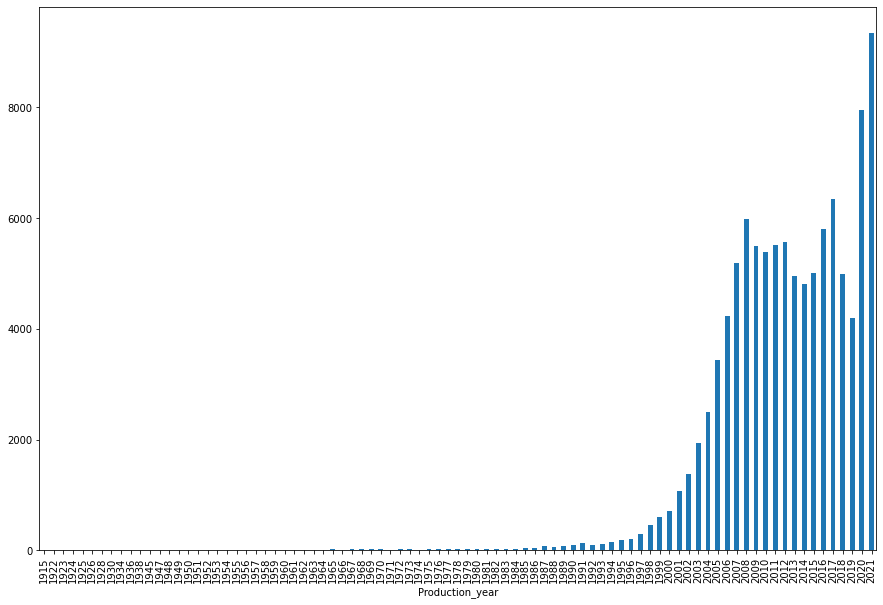

In [11]:
data.groupby('Production_year')['Price'].count().plot.bar(figsize=(15,10))

<AxesSubplot:xlabel='Power_HP'>

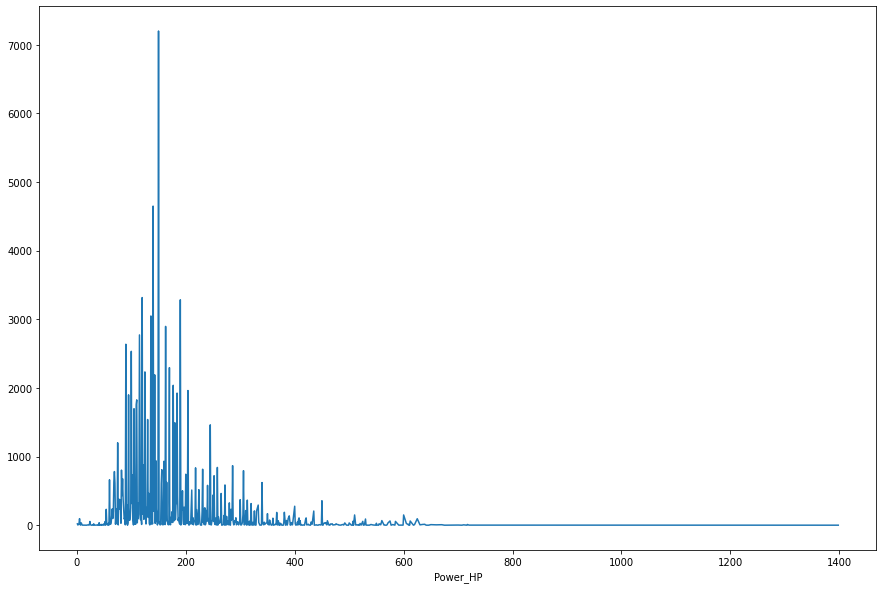

In [12]:
data.groupby('Power_HP')['Price'].count().plot(figsize=(15,10))

<AxesSubplot:xlabel='Displacement_cm3'>

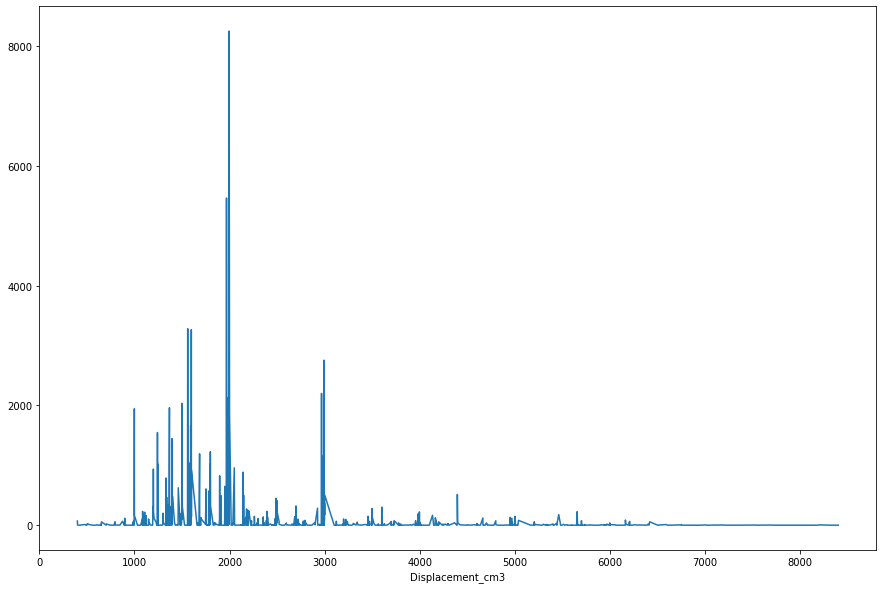

In [13]:
data.groupby('Displacement_cm3')['Price'].count().plot(figsize=(15,10))


<AxesSubplot:ylabel='Index'>

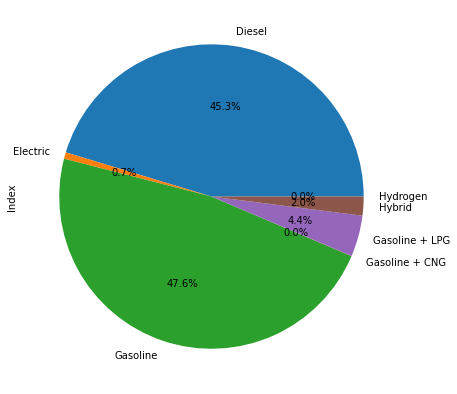

In [14]:
data.groupby('Fuel_type')['Index'].count().plot.pie(figsize=(12,7),autopct="%1.1f%%")

<AxesSubplot:xlabel='Vehicle_brand'>

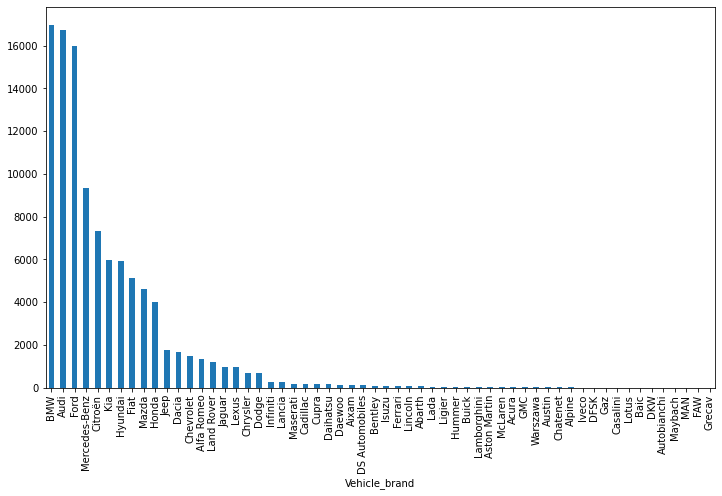

In [15]:
data.groupby('Vehicle_brand')['Index'].count().sort_values(ascending=False).plot.bar(figsize=(12,7))

<AxesSubplot:ylabel='Index'>

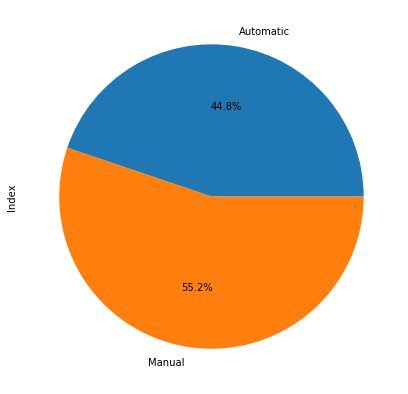

In [16]:
data.groupby('Transmission')['Index'].count().plot.pie(figsize=(12,7),autopct="%1.1f%%")

<AxesSubplot:ylabel='Index'>

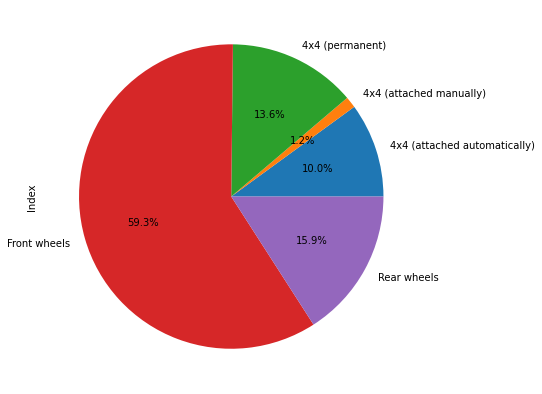

In [17]:
data.groupby('Drive')['Index'].count().plot.pie(figsize=(12,7),autopct="%1.1f%%")

<AxesSubplot:ylabel='Index'>

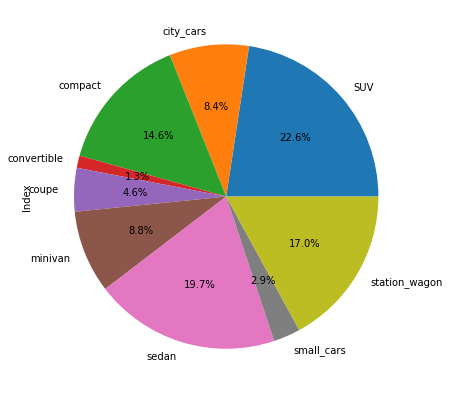

In [18]:
data.groupby('Type')['Index'].count().plot.pie(figsize=(12,7),autopct="%1.1f%%")

<AxesSubplot:ylabel='Index'>

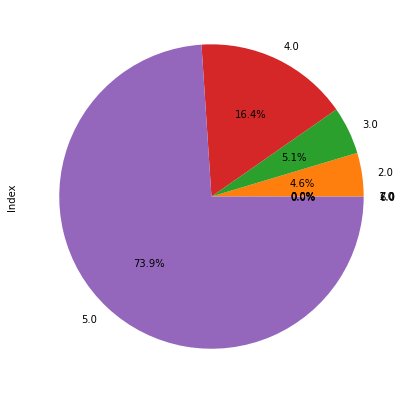

In [19]:
data.groupby('Doors_number')['Index'].count().plot.pie(figsize=(12,7),autopct="%1.1f%%")

<AxesSubplot:xlabel='Production_year'>

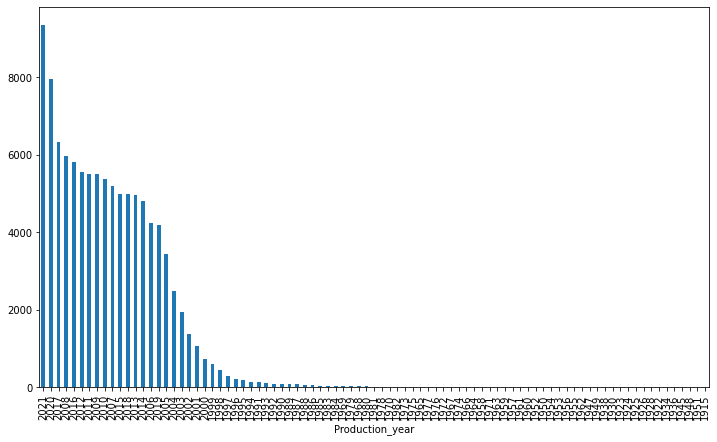

In [20]:
data.groupby('Production_year')['Index'].count().sort_values(ascending=False).plot.bar(figsize=(12,7))

<AxesSubplot:ylabel='Index'>

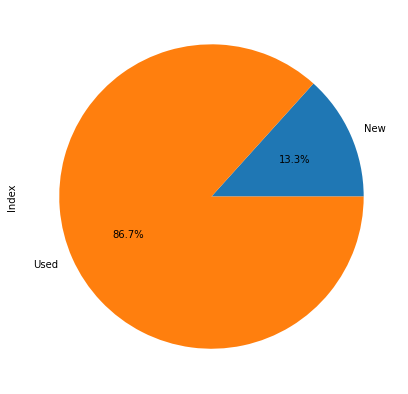

In [21]:
data.groupby('Condition')['Index'].count().plot.pie(figsize=(12,7),autopct="%1.1f%%")

In [22]:
data.describe()

,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number
count,105000.00000,1.050000e+05,105000.000000,1.050000e+05,105000.000000,105000.000000,104224.000000
mean,52499.50000,7.451938e+04,2012.196086,1.384271e+05,170.469964,2049.539888,4.596475
std,30311.03347,1.008945e+05,6.948696,3.275868e+05,88.356325,835.501644,0.787655
min,0.00000,5.000000e+02,1915.000000,1.000000e+00,1.000000,400.000000,1.000000
25%,26249.75000,1.970000e+04,2008.000000,4.713575e+04,115.000000,1560.000000,4.000000
50%,52499.50000,4.090000e+04,2013.000000,1.410000e+05,150.000000,1984.000000,5.000000
75%,78749.25000,8.900000e+04,2018.000000,2.080000e+05,193.000000,2000.000000,5.000000
max,104999.00000,6.999000e+06,2021.000000,1.000000e+08,1398.000000,8400.000000,7.000000


In [23]:
nu_col1 = data.nunique()
print(nu_col1)

Index                     105000
Price                      10250
Currency                       2
Condition                      2
Vehicle_brand                 58
Vehicle_model                716
Production_year               87
Mileage_km                 27417
Power_HP                     529
Displacement_cm3             921
Fuel_type                      7
Drive                          5
Transmission                   2
Type                           9
Doors_number                   7
Colour                        14
Offer_publication_date        37
Offer_location             10662
Features                   89247
dtype: int64


In [25]:
data.groupby('Currency').count()

,Index,Price,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Offer_publication_date,Offer_location,Features
Currency,,,,,,,,,,,,,,,,,,
EUR,142,142,142,142,142,142,142,142,142,142,99,137,142,131,142,142,142,142
PLN,104858,104858,104858,104858,104858,104858,104858,104858,104858,104858,97479,104598,104858,104093,104858,104858,104858,104858


usuwam ceny w euro aby była tylko 1 waluta, będziemy chcieli później przewidzieć cenę samochodów

In [28]:
data=data[data['Currency']=='PLN']

sprawdźmy czy jest zależność między ceną a popularnością marki.

In [38]:
df2=pd.DataFrame(data['Vehicle_brand'].value_counts())
df2['index']=df2.index
df2 = df2.rename(columns={'Vehicle_brand': 'quantity','index':'Vehicle_brand'})
df2

,quantity,Vehicle_brand
BMW,16942,BMW
Audi,16706,Audi
Ford,15975,Ford
Mercedes-Benz,9313,Mercedes-Benz
Citroën,7323,Citroën
Kia,5967,Kia
Hyundai,5931,Hyundai
Fiat,5133,Fiat
Mazda,4613,Mazda
Honda,4002,Honda


In [39]:
def rank(ex):
    if ex<=100:
        return 0
    elif 100<ex<=500:
        return 1
    elif 500<ex<=1000:
        return 2
    elif 1000<ex<=2000:
        return 3
    elif 2000<ex<=5000:
        return 4
    else:
        return 5

<AxesSubplot:xlabel='Brand_popularity'>

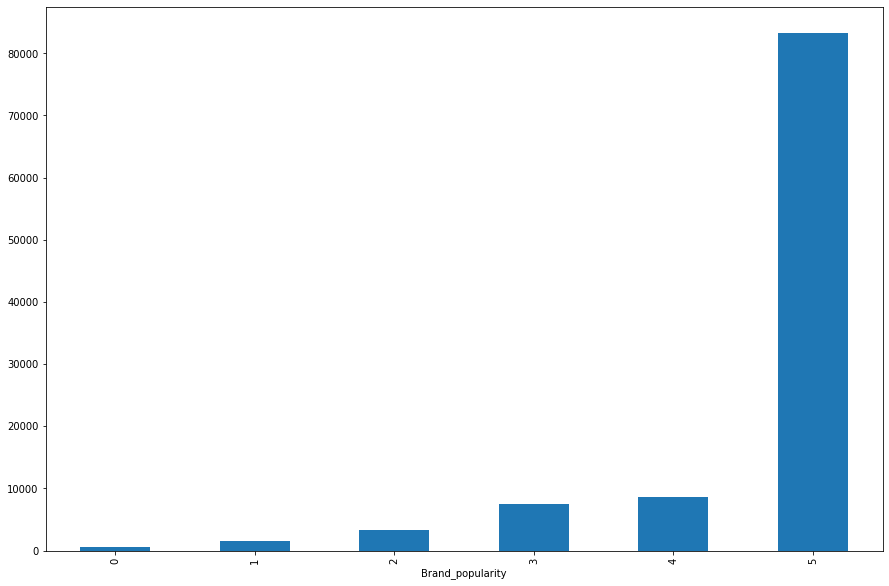

In [40]:
data=pd.merge(data, df2, how='left', on ='Vehicle_brand')
data.loc[:,'Brand_popularity']=data['quantity'].apply(rank)
data.groupby('Brand_popularity')['Index'].count().plot.bar(figsize=(15,10))

sprawdźmy korelację

In [41]:
data.corr()

,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,quantity_x,quantity_y,quantity,Brand_popularity
Index,1.000000,-0.001042,0.056445,-0.038455,-0.081827,-0.034309,0.052407,-0.541220,-0.541220,-0.541220,-0.152590
Price,-0.001042,1.000000,0.468837,-0.148855,0.633841,0.349581,-0.055298,0.055111,0.055111,0.055111,-0.089126
Production_year,0.056445,0.468837,1.000000,-0.218328,0.174644,-0.154358,0.220641,-0.027638,-0.027638,-0.027638,0.016119
Mileage_km,-0.038455,-0.148855,-0.218328,1.000000,-0.043663,0.041756,-0.013546,0.056157,0.056157,0.056157,0.036300
Power_HP,-0.081827,0.633841,0.174644,-0.043663,1.000000,0.814609,-0.201841,0.137341,0.137341,0.137341,-0.142655
Displacement_cm3,-0.034309,0.349581,-0.154358,0.041756,0.814609,1.000000,-0.253471,0.069800,0.069800,0.069800,-0.199516
Doors_number,0.052407,-0.055298,0.220641,-0.013546,-0.201841,-0.253471,1.000000,-0.002616,-0.002616,-0.002616,0.085782
quantity_x,-0.541220,0.055111,-0.027638,0.056157,0.137341,0.069800,-0.002616,1.000000,1.000000,1.000000,0.653494
quantity_y,-0.541220,0.055111,-0.027638,0.056157,0.137341,0.069800,-0.002616,1.000000,1.000000,1.000000,0.653494
quantity,-0.541220,0.055111,-0.027638,0.056157,0.137341,0.069800,-0.002616,1.000000,1.000000,1.000000,0.653494


jak widzimy nie ma żadnej korelacji między popularnością marki a ceną

In [43]:
df3=data.drop(['Currency','Vehicle_brand','Vehicle_model','Offer_publication_date','Offer_location','Features','quantity'], axis=1)
df3=pd.get_dummies(df3)
df3

,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,quantity_x,quantity_y,Brand_popularity,...,Colour_burgundy,Colour_golden,Colour_gray,Colour_green,Colour_other,Colour_red,Colour_silver,Colour_violet,Colour_white,Colour_yellow
0,0,86200,2021,1.000000,145.0,1400.0,3.0,57,57,0,...,0,0,1,0,0,0,0,0,0,0
1,1,43500,1974,59000.000000,75.0,1100.0,2.0,57,57,0,...,0,0,0,0,0,0,1,0,0,0
2,2,44900,2018,52000.000000,180.0,1368.0,3.0,57,57,0,...,0,0,0,0,0,0,1,0,0,0
3,3,39900,2012,29000.000000,160.0,1368.0,3.0,57,57,0,...,0,0,1,0,0,0,0,0,0,0
4,4,97900,2021,600.000000,165.0,1368.0,3.0,57,57,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104853,104995,23000,2010,52500.000000,95.0,1498.0,5.0,9313,9313,5,...,0,0,0,0,0,0,1,0,0,0
104854,104996,20900,1990,250000.000000,122.0,1997.0,4.0,9313,9313,5,...,0,0,0,0,0,0,0,0,0,0
104855,104997,384999,2020,138427.133575,330.0,2925.0,NaN,9313,9313,5,...,0,0,1,0,0,0,0,0,0,0
104856,104998,405000,2020,138427.133575,330.0,2925.0,NaN,9313,9313,5,...,0,0,1,0,0,0,0,0,0,0


In [44]:
df3.isnull().sum()

Index                                   0
Price                                   0
Production_year                         0
Mileage_km                              0
Power_HP                                0
Displacement_cm3                        0
Doors_number                          765
quantity_x                              0
quantity_y                              0
Brand_popularity                        0
Condition_New                           0
Condition_Used                          0
Fuel_type_Diesel                        0
Fuel_type_Electric                      0
Fuel_type_Gasoline                      0
Fuel_type_Gasoline + CNG                0
Fuel_type_Gasoline + LPG                0
Fuel_type_Hybrid                        0
Fuel_type_Hydrogen                      0
Drive_4x4 (attached automatically)      0
Drive_4x4 (attached manually)           0
Drive_4x4 (permanent)                   0
Drive_Front wheels                      0
Drive_Rear wheels                 

In [46]:
df3=df3.drop(['Index','Doors_number'], axis=1)

<AxesSubplot:>

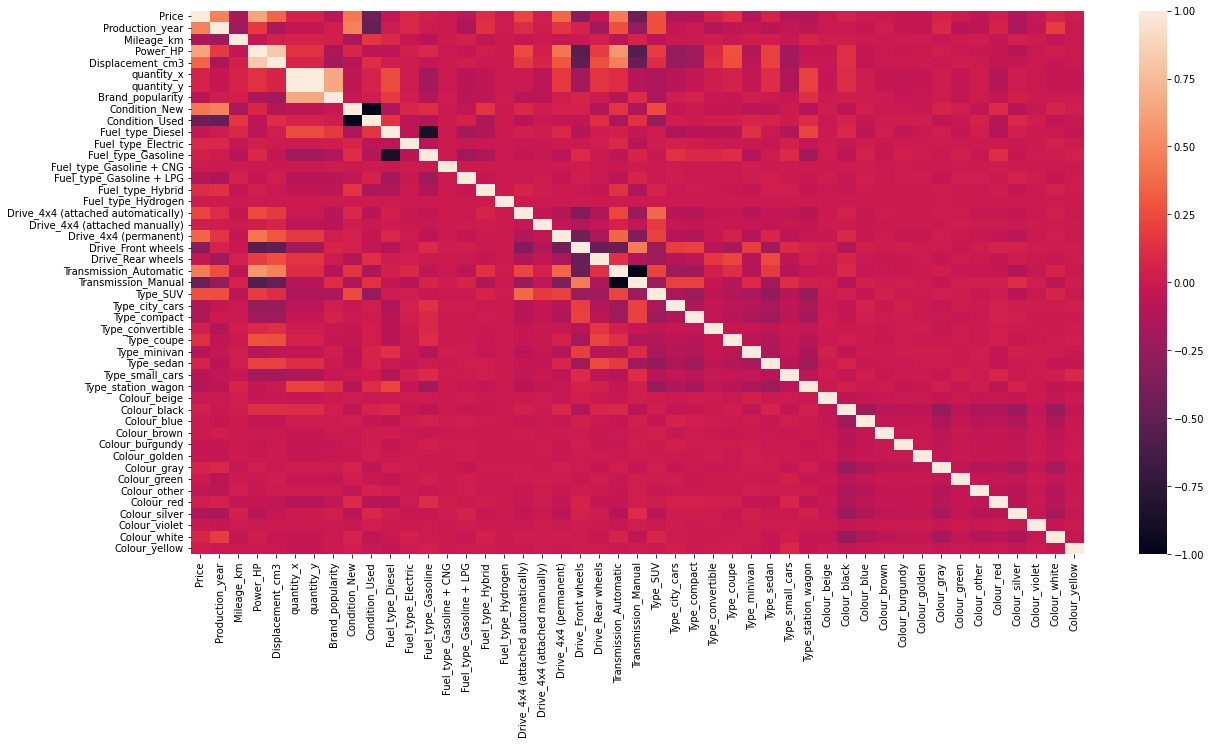

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
sns.heatmap(df3.corr())